In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
df = pd.read_csv("GOOG_train.csv")

In [220]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
1,2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2,2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
3,2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
4,2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [222]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [223]:
df.Date= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

In [224]:
data = list(df2["Close"])

In [225]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  1.9368159937737082
2. P-Value :  0.9985850027950328
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 1235
5. Critical Values :
	 1% :  -3.4356560275160835
	 5% :  -2.8638831211270817
	 10% :  -2.568017509711682


In [226]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [228]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [229]:
x_train= data[:-30]
x_test = data[-30:]
print(len(x_train),len(x_test))

1228 30


In [231]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11344.912, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11352.162, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11339.446, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11340.105, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11355.272, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11341.026, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11340.960, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11342.904, Time=1.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11343.758, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.733 seconds


In [316]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(1,1,0))

In [317]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5669.879
Date:                Tue, 26 Jul 2022   AIC                          11343.758
Time:                        11:09:10   BIC                          11354.031
Sample:                             0   HQIC                         11347.619
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1034      0.017     -6.209      0.000      -0.136      -0.071
sigma2       485.0210      9.481     51.156      0.000     466.438     503.604
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2181.53
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               9.53   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [318]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = result.predict(start=start,end=end)
pred

array([2309.14827932, 2372.38542296, 2424.72331959, 2412.16377522,
       2396.71536636, 2358.48000923, 2356.48259262, 2378.80608083,
       2396.8974719 , 2347.55526901, 2312.16096685, 2246.28309162,
       2259.60377737, 2310.558143  , 2320.8672045 , 2305.2885739 ,
       2308.16414932, 2351.19226892, 2346.23616466, 2400.30527341,
       2408.82195805, 2431.00153296, 2405.71663798, 2410.62452958,
       2427.92350437, 2422.16180257, 2406.33332446, 2446.88598984,
       2464.6087469 , 2481.11756789])

In [319]:
pred3 = result.predict(start=end,end=end+10)
pred3

array([2481.11756789, 2490.51608434, 2490.60744709, 2490.59800266,
       2490.59897896, 2490.59887804, 2490.59888847, 2490.59888739,
       2490.5988875 , 2490.59888749, 2490.59888749])

In [320]:
s = pd.Series(pred, index =df2.index[-30:])
s

Date
2021-04-28    2309.148279
2021-04-29    2372.385423
2021-04-30    2424.723320
2021-05-03    2412.163775
2021-05-04    2396.715366
2021-05-05    2358.480009
2021-05-06    2356.482593
2021-05-07    2378.806081
2021-05-10    2396.897472
2021-05-11    2347.555269
2021-05-12    2312.160967
2021-05-13    2246.283092
2021-05-14    2259.603777
2021-05-17    2310.558143
2021-05-18    2320.867205
2021-05-19    2305.288574
2021-05-20    2308.164149
2021-05-21    2351.192269
2021-05-24    2346.236165
2021-05-25    2400.305273
2021-05-26    2408.821958
2021-05-27    2431.001533
2021-05-28    2405.716638
2021-06-01    2410.624530
2021-06-02    2427.923504
2021-06-03    2422.161803
2021-06-04    2406.333324
2021-06-07    2446.885990
2021-06-08    2464.608747
2021-06-09    2481.117568
dtype: float64

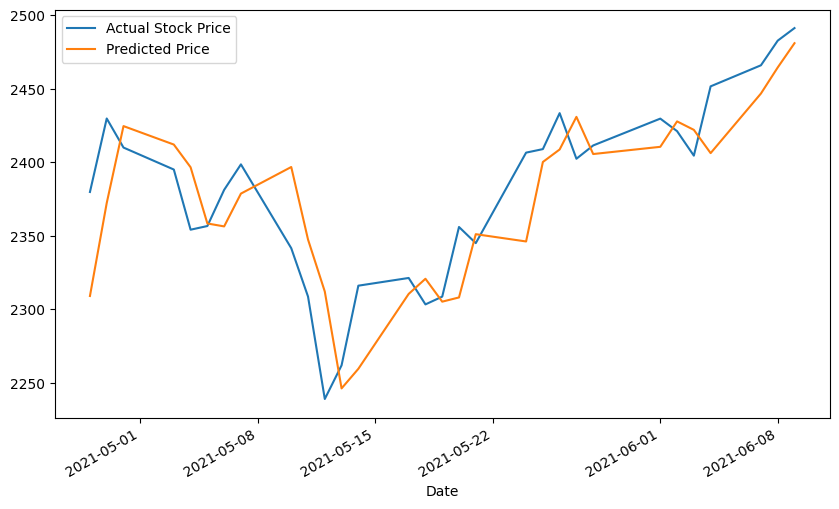

In [321]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-30:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

In [252]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

34.89125872508387

In [253]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.6739428036606327

In [283]:
test = pd.read_csv("GOOG_test.csv")
test.Date= pd.to_datetime(test.Date)
test2 =test.set_index('Date')
test2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [284]:
test2.info()
test2.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-06-10 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,2702.674255,2730.161156,2672.508566,2700.858899,2700.858899,1.303822e+06
std,207.658815,202.614255,208.531935,205.434607,205.434607,5.369361e+05
min,2102.840088,2127.899902,2044.160034,2116.790039,2116.790039,5.933000e+05
25%,2596.669922,2618.074951,2550.070068,2584.800049,2584.800049,9.462000e+05
50%,2742.194092,2767.989990,2714.000000,2740.090088,2740.090088,1.182100e+06
75%,2864.020020,2885.959961,2834.699951,2856.060059,2856.060059,1.512400e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,4.487500e+06


In [334]:
data = list(df2["Close"])
test = list(test2["Close"])
data.extend(test)
len(data)

1511

In [325]:
d_value2 = ndiffs(data,test = "adf")
print("d value:", d_value2)

d value: 1


In [326]:
stepwise_fit2 = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14347.096, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14353.081, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14344.966, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14345.393, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14353.185, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14346.190, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14344.779, Time=1.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14346.779, Time=1.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14346.779, Time=2.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14346.728, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14345.148, Time=0.56 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 11.886 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

In [328]:
model2 = sm.tsa.arima.ARIMA(data, order=(1,1,1))
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1511
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7169.574
Date:                Tue, 26 Jul 2022   AIC                          14345.148
Time:                        11:56:37   BIC                          14361.108
Sample:                             0   HQIC                         14351.092
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5012      0.136     -3.683      0.000      -0.768      -0.234
ma.L1          0.4237      0.141      2.999      0.003       0.147       0.701
sigma2       780.2720     14.192     54.978      0.000     752.455     808.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2307.40
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              11.47   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [329]:
pred2 = result2.predict(start=len(data),end=len(data)+10)
pred2

array([2302.42206511, 2300.3861073 , 2301.40658169, 2300.8950937 ,
       2301.15146462, 2301.02296493, 2301.08737228, 2301.05508966,
       2301.07127054, 2301.06316026, 2301.06722534])

In [330]:
import datetime
start_date = datetime.datetime(2022,6,9)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [331]:
s2 = pd.Series(pred2, index = dates)
s2

2022-06-09    2302.422065
2022-06-10    2300.386107
2022-06-11    2301.406582
2022-06-12    2300.895094
2022-06-13    2301.151465
2022-06-14    2301.022965
2022-06-15    2301.087372
2022-06-16    2301.055090
2022-06-17    2301.071271
2022-06-18    2301.063160
2022-06-19    2301.067225
dtype: float64

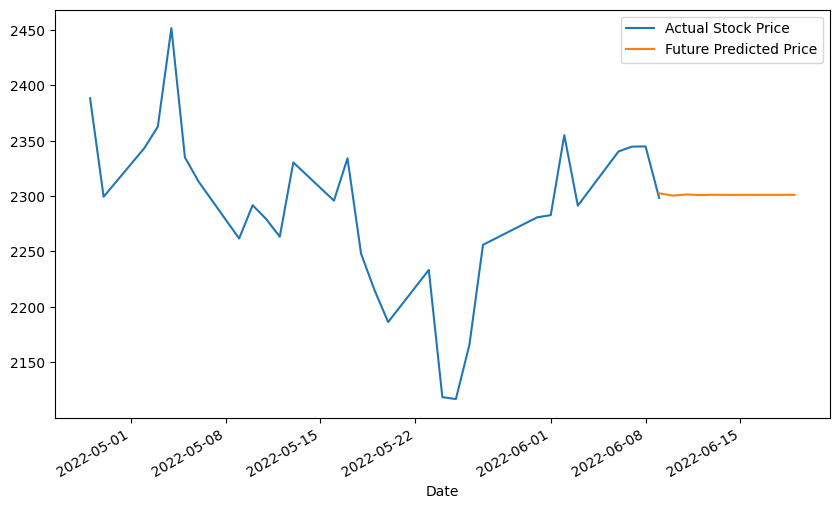

In [333]:
plt.figure(figsize=(10,6), dpi=100)
test2['Close'][-30:].plot(label='Actual Stock Price', legend=True)
s2.plot(label='Future Predicted Price', legend=True,)